In [1]:
import tensorflow as tf

2023-09-04 17:26:14.415949: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-04 17:26:15.292314: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [62]:
blocks = tf.tile(tf.repeat(tf.range(3), 3), [3])
print(blocks)
blocks = tf.concat([blocks, blocks + 3, blocks + 6], axis=0)
blocks

tf.Tensor([0 0 0 1 1 1 2 2 2 0 0 0 1 1 1 2 2 2 0 0 0 1 1 1 2 2 2], shape=(27,), dtype=int32)


<tf.Tensor: shape=(81,), dtype=int32, numpy=
array([0, 0, 0, 1, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 2, 2, 2, 0, 0, 0, 1,
       1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 3, 3, 3, 4, 4, 4, 5, 5,
       5, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 6, 6, 6,
       7, 7, 7, 8, 8, 8, 6, 6, 6, 7, 7, 7, 8, 8, 8], dtype=int32)>

In [80]:
import numpy as np

x = np.arange(81).reshape(9,9)
x = np.zeros_like(x)

for i in np.arange(0,9,3):
    for j in np.arange(0,9,3):
        
        x[i:i+3,j:j+3] += i *3 + j
x

array([[ 0,  0,  0,  3,  3,  3,  6,  6,  6],
       [ 0,  0,  0,  3,  3,  3,  6,  6,  6],
       [ 0,  0,  0,  3,  3,  3,  6,  6,  6],
       [ 9,  9,  9, 12, 12, 12, 15, 15, 15],
       [ 9,  9,  9, 12, 12, 12, 15, 15, 15],
       [ 9,  9,  9, 12, 12, 12, 15, 15, 15],
       [18, 18, 18, 21, 21, 21, 24, 24, 24],
       [18, 18, 18, 21, 21, 21, 24, 24, 24],
       [18, 18, 18, 21, 21, 21, 24, 24, 24]])

In [81]:
grouped = x.reshape(3,3,3,3).transpose((0,2,1,3)).reshape(9,9)
grouped

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  3,  3,  3,  3,  3,  3,  3,  3],
       [ 6,  6,  6,  6,  6,  6,  6,  6,  6],
       [ 9,  9,  9,  9,  9,  9,  9,  9,  9],
       [12, 12, 12, 12, 12, 12, 12, 12, 12],
       [15, 15, 15, 15, 15, 15, 15, 15, 15],
       [18, 18, 18, 18, 18, 18, 18, 18, 18],
       [21, 21, 21, 21, 21, 21, 21, 21, 21],
       [24, 24, 24, 24, 24, 24, 24, 24, 24]])

In [82]:
regrouped = grouped.reshape(3,3,3,3).transpose((0,2,1,3)).reshape(9,9)
regrouped

array([[ 0,  0,  0,  3,  3,  3,  6,  6,  6],
       [ 0,  0,  0,  3,  3,  3,  6,  6,  6],
       [ 0,  0,  0,  3,  3,  3,  6,  6,  6],
       [ 9,  9,  9, 12, 12, 12, 15, 15, 15],
       [ 9,  9,  9, 12, 12, 12, 15, 15, 15],
       [ 9,  9,  9, 12, 12, 12, 15, 15, 15],
       [18, 18, 18, 21, 21, 21, 24, 24, 24],
       [18, 18, 18, 21, 21, 21, 24, 24, 24],
       [18, 18, 18, 21, 21, 21, 24, 24, 24]])

In [163]:


layer = SudokuDoubleSoftmaxLayer()

with tf.GradientTape() as tape:
    
    l = layer(x)
    
    loss = tf.reduce_sum(l[:,4,4,0] * 20)

grad = tape.gradient(loss, x)

In [164]:
np.round(grad.numpy()[0,:,:,0], 2)

array([[ 0.  ,  0.  ,  0.  ,  0.  , -0.1 ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  , -0.02,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  , -0.01,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , -0.06, -0.33, -0.03,  0.  ,  0.  ,  0.  ],
       [-0.06, -0.06, -0.02, -0.14,  1.32, -0.17, -0.01, -0.07, -0.01],
       [ 0.  ,  0.  ,  0.  , -0.03, -0.12, -0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  , -0.03,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  , -0.05,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  , -0.01,  0.  ,  0.  ,  0.  ,  0.  ]],
      dtype=float32)

In [165]:
np.round(grad.numpy()[0,:,:,1], 2)

array([[ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.01,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.01,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.02,  0.04,  0.04,  0.  ,  0.  ,  0.  ],
       [ 0.03,  0.02,  0.  ,  0.01, -0.26,  0.02,  0.  ,  0.01,  0.01],
       [ 0.  ,  0.  ,  0.  ,  0.01,  0.03,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.01,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.01,  0.  ,  0.  ,  0.  ,  0.  ]],
      dtype=float32)

: 

In [5]:
import json
import logging
from load_data import get_data, get_tf_dataset
import argparse
import time
from deepsudoku.utils import visualize_sudoku
import tensorflow as tf
from deepsudoku.utils import visualize_sudoku
import numpy as np
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, ReLU, Flatten, Dense, Reshape, Softmax
from keras.utils.layer_utils import count_params  
from tensorflow.keras import layers
import numpy as np
from metrics_and_wrapper import SudokuWinRate, MaskedAccuracy, MaskedSudokuWinRate, SudukoWrapper
from architectures import *
from load_data import get_data, get_tf_dataset


train_df = get_data("train", "realistic_easy_data").sample(frac=1)


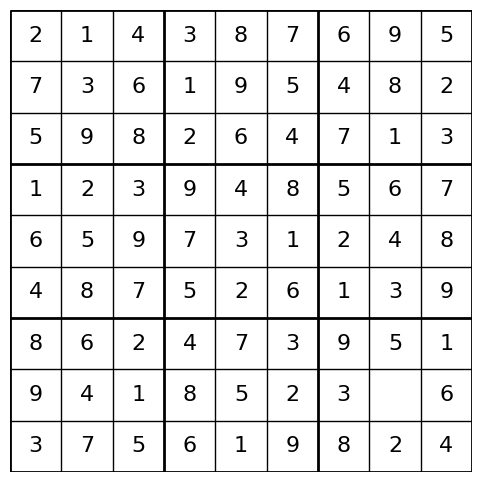

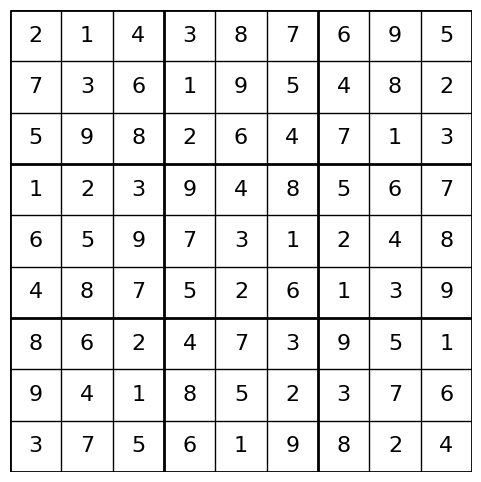

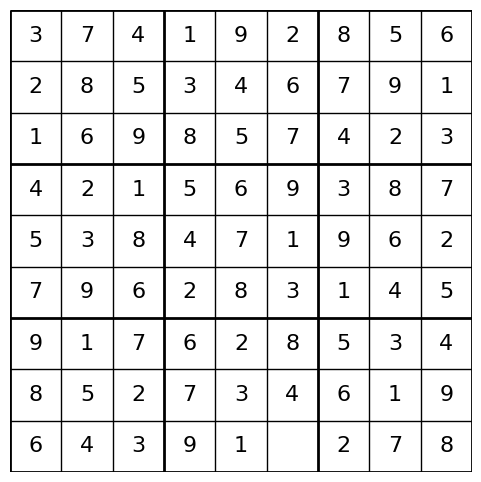

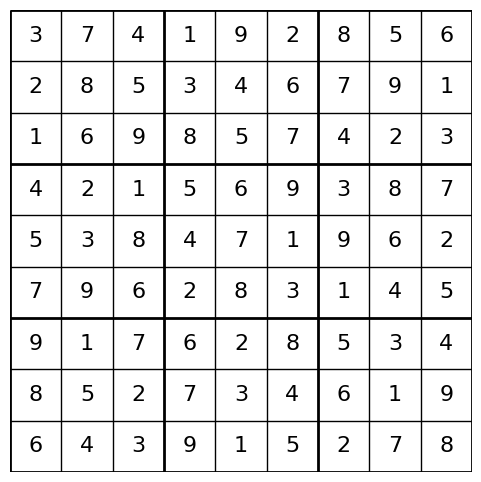

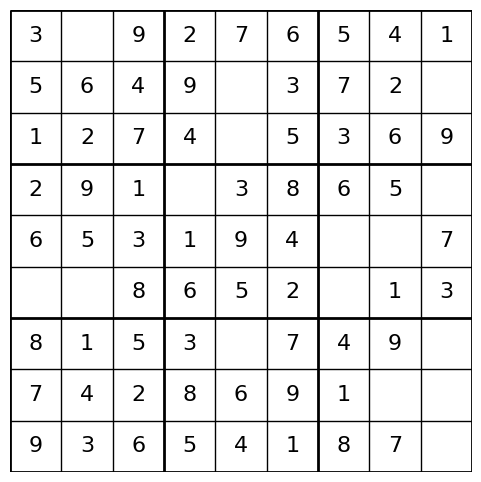

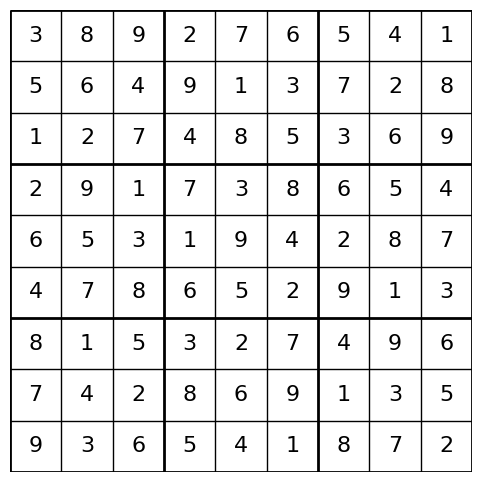

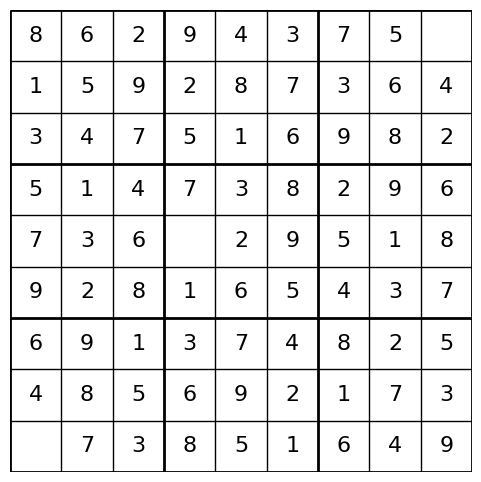

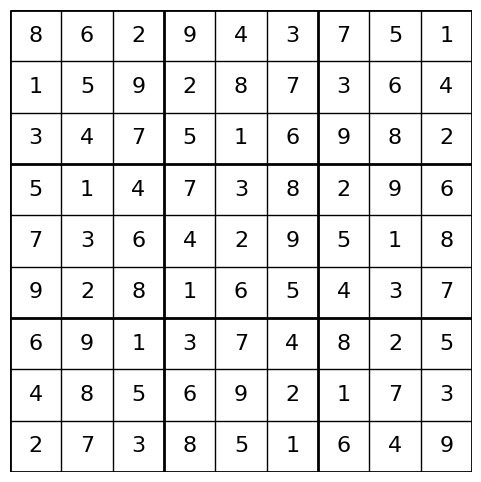

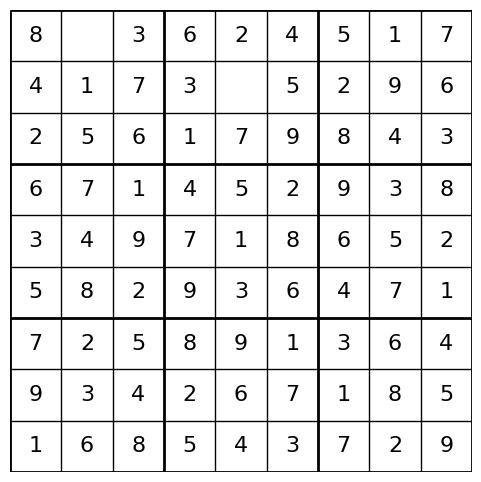

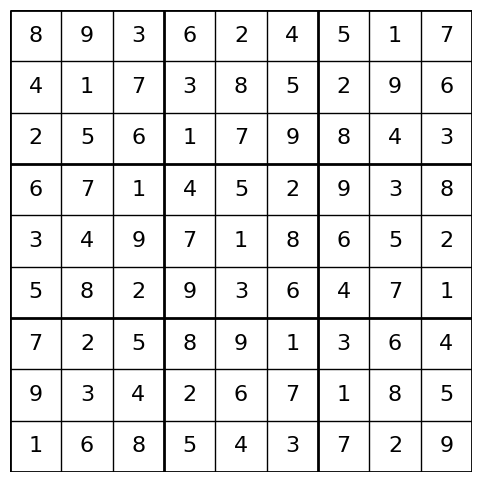

In [6]:
for i in np.random.choice(len(train_df), 5):

    visualize_sudoku(train_df.quiz.iloc[i])
    visualize_sudoku(train_df.solution.iloc[i])

In [3]:
with tf.device("GPU:0"):

    ds = get_tf_dataset(train_df.iloc[:100])

2023-09-03 17:50:22.786195: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-03 17:50:22.810463: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-03 17:50:22.810632: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [7]:
for x,y in ds:

    print(x)
    print(y)
    break



tf.Tensor(
[[0 8 9 5 6 2 1 4 3]
 [6 3 1 0 4 0 5 0 2]
 [4 2 5 1 3 8 9 6 0]
 [2 0 8 9 7 0 6 1 4]
 [1 9 4 2 5 6 3 0 8]
 [3 0 6 4 0 0 2 5 9]
 [9 6 2 8 1 4 7 0 0]
 [8 1 0 3 0 0 0 9 6]
 [5 4 3 6 0 7 8 2 1]], shape=(9, 9), dtype=int64)
tf.Tensor(
[[7 8 9 5 6 2 1 4 3]
 [6 3 1 7 4 9 5 8 2]
 [4 2 5 1 3 8 9 6 7]
 [2 5 8 9 7 3 6 1 4]
 [1 9 4 2 5 6 3 7 8]
 [3 7 6 4 8 1 2 5 9]
 [9 6 2 8 1 4 7 3 5]
 [8 1 7 3 2 5 4 9 6]
 [5 4 3 6 9 7 8 2 1]], shape=(9, 9), dtype=int64)


In [12]:
back_bone = tf.keras.models.load_model("ckpt/same_fc_mlp_1693748930.0140688/final_model/")
model = SudukoWrapper(back_bone)

In [20]:
pred = tf.argmax( model(x[None,:]), -1)[0]
pred

<tf.Tensor: shape=(9, 9), dtype=int64, numpy=
array([[8, 7, 8, 4, 5, 1, 0, 3, 2],
       [5, 2, 0, 6, 3, 8, 4, 7, 1],
       [3, 1, 4, 0, 2, 7, 8, 5, 8],
       [1, 4, 7, 8, 6, 2, 5, 0, 3],
       [0, 8, 3, 1, 4, 5, 2, 6, 7],
       [2, 5, 5, 3, 7, 0, 1, 6, 8],
       [8, 5, 1, 7, 0, 3, 6, 2, 4],
       [7, 0, 6, 2, 1, 3, 1, 8, 5],
       [4, 3, 2, 5, 1, 6, 7, 8, 0]])>